<a href="https://colab.research.google.com/github/andrebelem/ensino/blob/main/%5BEXTRA_02%5D_Exerc%C3%ADcio_EDO_Solu%C3%A7%C3%A3o_Num%C3%A9rica_Euler_e_ODEINT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](http://observatoriooceanografico.org/wp-content/uploads/elementor/thumbs/logo-o2-2-p31vla9ib17i85olifd4l1xk0e5lktrkal6u0s4c6o.png)<br>
# Notebook no Python para prática e resolução de EDO pelo método de Euler e comparação com um *solver* (`odeint`) <br>

Criado por [Y.C.L.F. Paoli](mailto:ypaoli@id.uff.br),  [M.G.C. Silva](mailto:marinagaldez@id.uff.br) @ [Observatório Oceanográfico](http://www.observatoiriooceanografico.uff.br) 2021 (versão 1) para a monitoria da disciplina de **Modelagem e Otimização de Sistemas Agrícolas e Ambientais**<br>
[![DOI](https://zenodo.org/badge/342919527.svg)](https://zenodo.org/badge/latestdoi/342919527)
<br>
Você pode usar o Python para resolver EDOs usando agora um solver. Talvez você precise relembrar os conceitos apresentados em aula e que estão no Guia Rápido (veja no canal do [Github](https://github.com/andrebelem/ensino)). <br>
   
Histórico:<br>
Jun 2021: revisado e publicado no Github por [A.L.Belem](mailto:andrebelem@id.uff.br)<br>
   

(relembrando) Uma solução de uma EDO é uma função $y = f(x)$  cujas derivadas satisfazem a equação. Mas cautela - não está garantido que tal função exista, e caso exista, normalmente ela não é única. Quando falamos de coeficientes, uma equação diferencial pode ter coeficientes constantes ou funções da variável independente. Esse é apenas um lembrete. O material na internet sobre isso é [bem farto](https://www.google.com/search?q=EDO+matem%C3%A1tica) (pode conferir). Mas vamos ao que interessa:<br>

**Calcule** a solução aproximada do seguinte Problema de Valor Inicial (P.V.I.) usando Python simples (note que você pode fazer isso diretamente no colab).
\begin{cases}
y'= f(y,t) = y + 2 t       \\
y(0) = 1  
\end{cases}

Note que em EDO, a solução numérica pelo Método de Euler é 
$y_{k+1} = y_k + h . f(x_k,y_k)$. Para essa equação, a solução exata é $y = 3. e^t - 2(t + 1)$<br>
<br>

Além da solução, neste exercício vamos plotar os resultados e usar algums pacotes acessórios, o `numpy` e o `matplotlib`.

In [ ]:
# primeiro, importe os pacotes
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Vamos definir a equação em uma função EDO

def f(y,t):
    dy = y + 2*t
    return dy

In [ ]:
# definição dos parâmetros do método de Euler
# definimos aqui o passo de tempo. => teste diferentes passos (0.1, 0.01, ...)
h = 0.1 
tmax = 2 # t máximo igual a 2 significa que o cálculo será feito entre t=0 e t=2, isto é, tmax = último valor de t
# essa função gera vários valores de t entre 0 e tmax, separados por um passo=h, que serão colocados no array t
t = np.arange(0, tmax+h, h) 

Obs: O *passo* é a distância entre dois valores consecutivos da variável $x$ (neste caso, $t$), isto é, 
$h = t_{n+1} - t_{n}$<br>
Note que não estamos definindo uma unidade de tempo (segundos ou horas ou dias) porque isso é intrínsico na sua equação. É a equação que define o tempo. Veja o gráfico abaixo<br>
<center><img src="https://drive.google.com/uc?id=1ZtuexbeNkz_scTGkqgZeFtghcnrfuvQl" width="400"></img></center>

In [ ]:
# condição inicial
y0 = 1

In [ ]:
#Solução usando Euler

y_euler = np.zeros_like(t) # essa função cria um vetor composto por zeros do mesmo tamanho do vetor t
y_euler[0] = y0 # define que o primeiro valor do vetor será igual à condição inicial, isto é, o y0.
for n in range (t.size-1): # t.size dá o tamanho do array t
    y_euler[n+1] = y_euler[n] + h * f(y_euler[n], t[n])


In [ ]:
#solução exata
yexato = 3 * np.exp(t) - 2 * (t + 1)

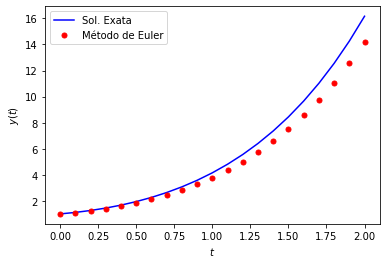

In [ ]:
# Vamos colocar a solução exata em um gráfico (lembre que lá em cima você deu o import)
plt.figure()
plt.title('')
plt.xlabel(f'$t$')
plt.ylabel(f'$y(t)$')
plt.plot(t, yexato, 'b', label='Sol. Exata')
plt.plot(t, y_euler, 'ro', markersize=5, label='Método de Euler')
plt.legend()
plt.show()

Por que a diferença entre a solução exata e a solução pelo método de Euler aumenta com o tempo ? (resposta está nas suas aulas de EDO !).

### Usando um `solver` (ODEINT)

Para calcular a mesma solução aproximada do seguinte Problema de Valor Inicial (P.V.I.) podemos usar agora um solver. Note que as condições iniciais são as mesmas:
\begin{cases}
y'= f(y,t) = y + 2 t       \\
y(0) = 1  
\end{cases}

A diferença aqui é que usamos um solver do módulo `scipy.integrate`, conhecido como `spi` (veja em no [SciPy.org](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html) onde há vários métodos disponíveis).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

In [ ]:
#definição da EDO

def f(y,t):
    dy = y + 2*t
    return dy

In [ ]:
# definição dos parâmetros do iniciais
# *** note que estamos fazendo aqui de novo mas não seria necessário caso você já tivesse rodado a mesma linha com essas definições.
h = 0.1 
tmax = 2 # t máximo igual a 2 significa que o cálculo será feito entre t=0 e t=2, isto é, tmax = último valor de t
# essa função gera vários valores de t entre 0 e tmax, separados por um passo=h, que serão colocados no array t
t = np.arange(0, tmax+h, h) 

In [ ]:
#condição inicial
y0 = 1

In [ ]:
#Solução usando o odeint

y_solver = spi.odeint(f, y0, t) #integra a equação diferencial e salva no array y

In [ ]:
# solução exata
yexato = 3 * np.exp(t) - 2 * (t + 1)

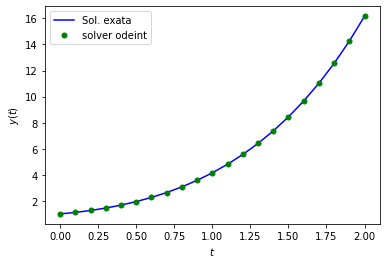

In [ ]:
# gráfico aqui (você pode explorar ainda elementos do gráfico para mudar a configuração dos pontos, cores das linhas, etc.)
plt.figure()
plt.title('')
plt.xlabel(f'$t$')
plt.ylabel(f'$y(t)$')
plt.plot(t, yexato, 'b', label='Sol. exata')
plt.plot(t, y_solver, 'go', markersize=5, label='solver odeint')
plt.legend()
plt.show()

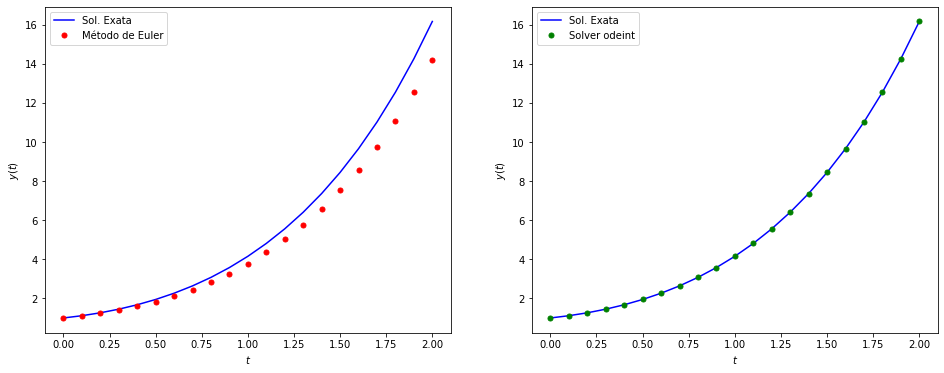

In [ ]:
# vamos ainda colocar um gráfico do lado do outro para facilitar (note os comandos para fazer isso)
fig, ax = plt.subplots(1,2,figsize=(16,6)) # note que ax[0] sera 1 gráfico e ax[1] o outro e você pode controlar o tamanho do gráfico

# Euler

ax[0].plot(t, yexato, 'b', label='Sol. Exata')
ax[0].plot(t, y_euler, 'ro', markersize=5, label='Método de Euler')
ax[0].legend()


# odeint
ax[1].plot(t, yexato, 'b', label='Sol. Exata')
ax[1].plot(t, y_solver, 'go', markersize=5, label='Solver odeint')
ax[1].legend()

for myax in ax: # como temos 2 eixos, faz um laço para escrever o label em cada um deles
    myax.set(xlabel=f'$t$', ylabel=f'$y(t)$')

fig.show()

Observando o gráfico, é possível ver que utilizando o mesmo passo (h=0.1) na função `odeint`, o resultado é muito mais preciso do que utilizando o método de Euler. Você pode ainda explorar outros solvers no [SciPy](https://docs.scipy.org/doc/scipy/reference/integrate.html). Mas agora responda:<br>
Nas soluções numéricas de equações diferenciais, o que é a **rigidez** ?<br>
<br>
A rigidez é caracterizada pela existência de duas ou mais escalas distintas para a variável independente e os problemas de valor inicial com equações rígidas são relativamente comuns, particularmente no estudo de ecossistemas e reações biogeoquímicas. Neste caso, outros métodos numéricos podem ser explorados. Você pode pesquisar isso e ver os tutoriais no próprio site do [SciPy.org](https://docs.scipy.org/doc/scipy/reference/integrate.html).



--**fim** --